##Waste Management Using CNN Model

In [2]:
# Install kagglehub
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)


100%|██████████| 427M/427M [00:03<00:00, 147MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [3]:
!pip install opencv.python

In [5]:
import os

# Replace with the actual path to the 'DATASET' folder
dataset_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"

# List contents of TRAIN and TEST folders
O_path = os.path.join(dataset_path, "O")
R_path = os.path.join(dataset_path, "R")

print("Contents of O:", os.listdir(O_path))
print("Contents of R:", os.listdir(R_path))


Contents of O: ['O_1763.jpg', 'O_11320.jpg', 'O_4060.jpg', 'O_9869.jpg', 'O_7583.jpg', 'O_3877.jpg', 'O_5717.jpg', 'O_10911.jpg', 'O_3984.jpg', 'O_3891.jpg', 'O_5973.jpg', 'O_11881.jpg', 'O_5902.jpg', 'O_2719.jpg', 'O_8159.jpg', 'O_12535.jpg', 'O_3870.jpg', 'O_2840.jpg', 'O_10884.jpg', 'O_5043.jpg', 'O_8360.jpg', 'O_12304.jpg', 'O_12472.jpg', 'O_3795.jpg', 'O_12541.jpg', 'O_4308.jpg', 'O_5583.jpg', 'O_11048.jpg', 'O_12308.jpg', 'O_12052.jpg', 'O_2578.jpg', 'O_3296.jpg', 'O_12055.jpg', 'O_2240.jpg', 'O_1696.jpg', 'O_9435.jpg', 'O_7165.jpg', 'O_7115.jpg', 'O_9909.jpg', 'O_8756.jpg', 'O_511.jpg', 'O_4181.jpg', 'O_177.jpg', 'O_2958.jpg', 'O_1707.jpg', 'O_6069.jpg', 'O_9121.jpg', 'O_11267.jpg', 'O_4959.jpg', 'O_7265.jpg', 'O_12490.jpg', 'O_8264.jpg', 'O_10961.jpg', 'O_1936.jpg', 'O_8767.jpg', 'O_6500.jpg', 'O_6260.jpg', 'O_9863.jpg', 'O_11063.jpg', 'O_4223.jpg', 'O_746.jpg', 'O_3144.jpg', 'O_9901.jpg', 'O_9690.jpg', 'O_5974.jpg', 'O_714.jpg', 'O_7022.jpg', 'O_1711.jpg', 'O_9976.jpg', 'O_714

In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [6]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
#visualization
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
  for file in tqdm(glob(category+'/*')):
    img_array=cv2.imread(file)
    img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_array=cv2.resize(img_array,(224,224))
    x_data.append(img_array)
    y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [00:07<00:00, 1276.09it/s]


In [8]:
data.shape

(22564, 2)

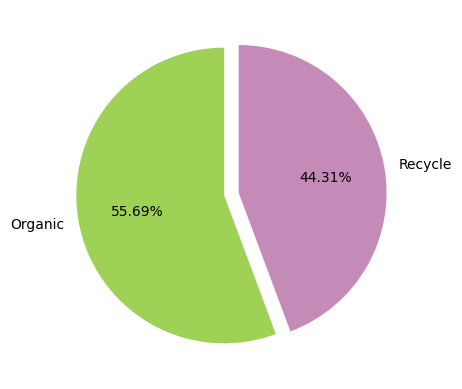

In [9]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recycle'], autopct='%0.2f%%', colors = colors, startangle = 90, explode=[0.05,0.05])
plt.show()

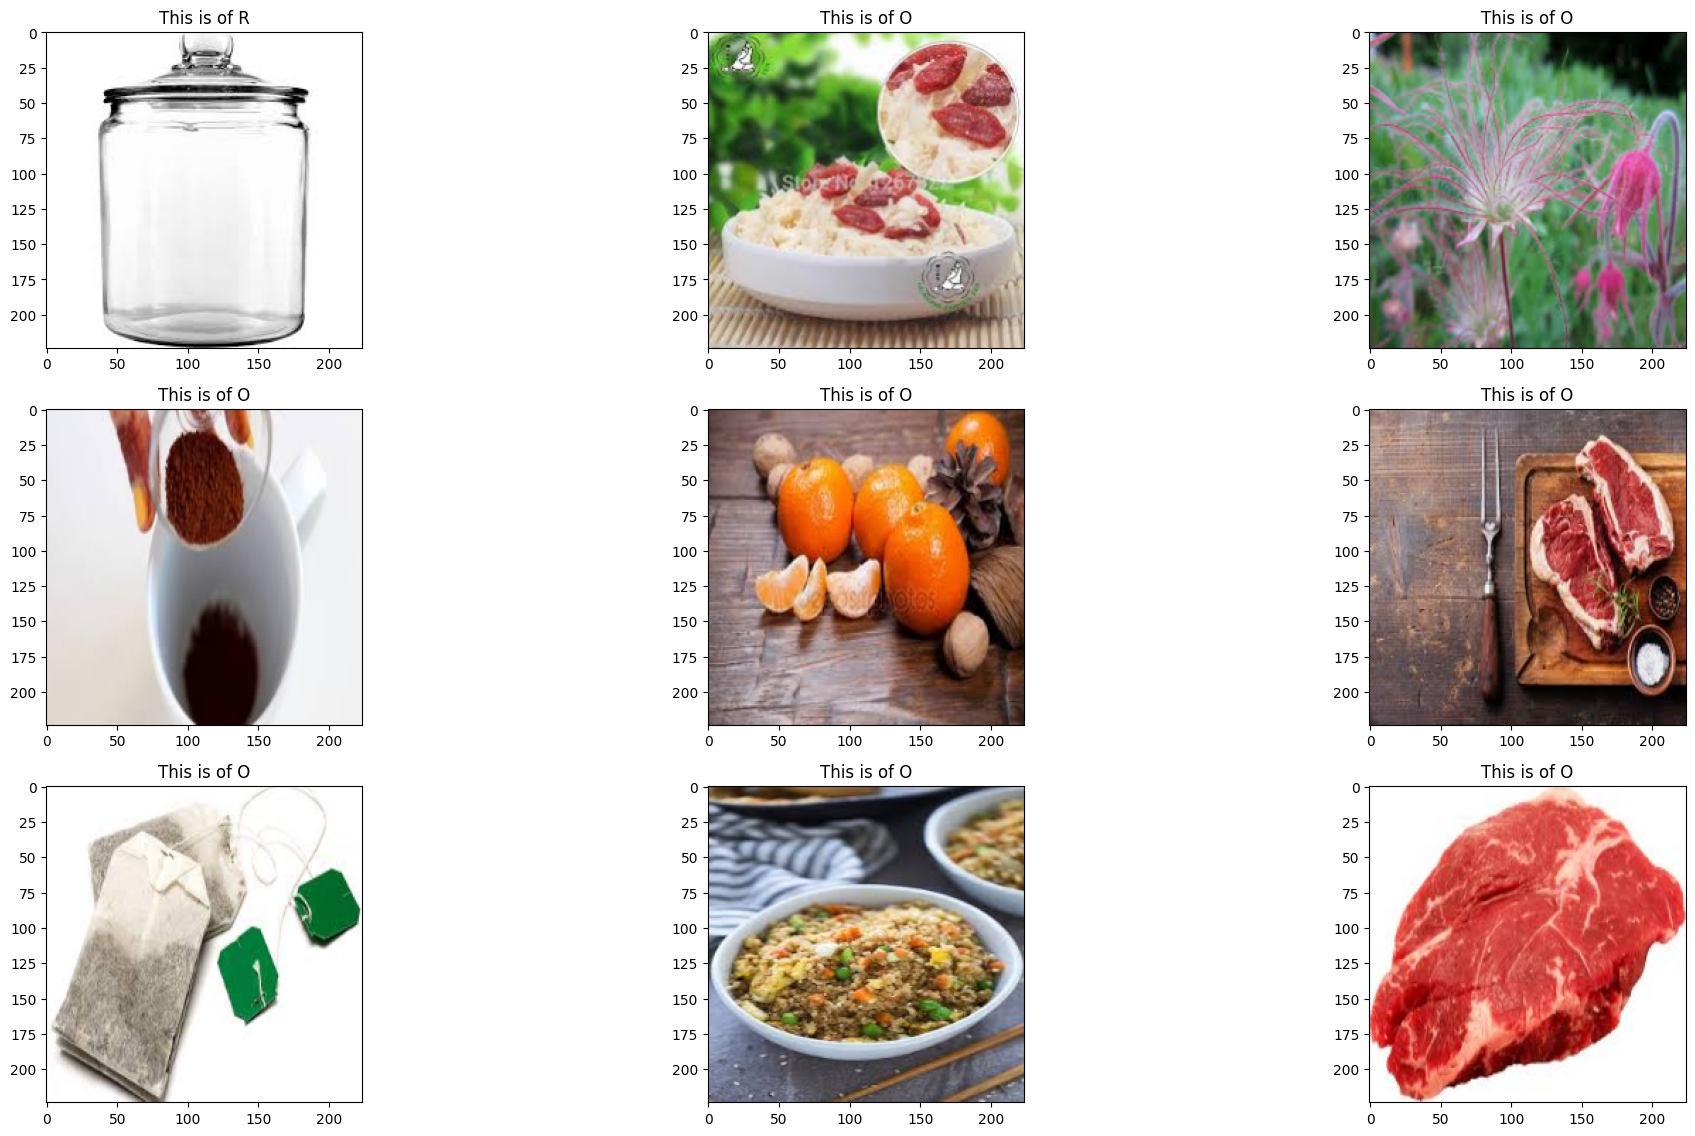

In [15]:
plt.figure(figsize=(20, 15))
for i in range(9):
  plt.subplot(4,3,(i%12)+1)
  index = np.random.randint(15000)
  plt.title('This is of {0}'.format(data.label[index]))
  plt.imshow(data.image[index])
  plt.tight_layout()

## CNN - Convolutional Neural Network

In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3),input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
batch_size = 256


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = 256,
    color_mode = "rgb",
    class_mode = 'categorical' )
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = 256,
    color_mode = "rgb",
    class_mode = 'categorical' )

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist =model.fit(
    train_generator,
    epochs =10,
    validation_data=test_generator
    )

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2659s 30s/step - accuracy: 0.7290 - loss: 0.5756 - val_accuracy: 0.8651 - val_loss: 0.3255
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2649s 30s/step - accuracy: 0.8212 - loss: 0.4232 - val_accuracy: 0.8345 - val_loss: 0.3616
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2621s 29s/step - accuracy: 0.8432 - loss: 0.3836 - val_accuracy: 0.8333 - val_loss: 0.3735
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2621s 29s/step - accuracy: 0.8470 - loss: 0.3723 - val_accuracy: 0.8953 - val_loss: 0.2655
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2694s 30s/step - accuracy: 0.8741 - loss: 0.3187 - val_accuracy: 0.8814 - val_loss: 0.3062
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2687s 30s/step - accuracy: 0.8808 - loss: 0.2990 - val_accuracy: 0.9005 - val_loss: 0.2739
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2640s 30s/step - accuracy: 0.8960 - loss: 0.2683 - val_accuracy: 0.8997 - val_loss: 0.2838
Epoch 8/10
74/89 ━━━━━━━━━━━━━━━━━━━━ 7:11 29s/step - accuracy: 0.9114 - loss: 0.2160